In [1]:
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import date
from datetime import time

In [2]:
taxi = sns.load_dataset("taxis")

### FILLING NULL VALUES USING FORWARD FILL METHOD

In [3]:
taxi.fillna(method="ffill",inplace=True)

### CORRELATION OF ALL ATTRIBUTES WITH EACH OTHER

<AxesSubplot:>

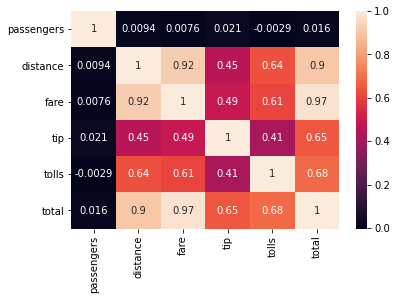

In [4]:
sns.heatmap(taxi.corr(),annot=True)

### REPLACING ZERO WITH FORWARD FILLING METHOD

In [5]:
taxi['passengers'].replace(to_replace=0, method='ffill',inplace=True)

### CREATING PIVOT TABLE ON PAYMENT 

In [6]:
pd.pivot_table(taxi,index=["payment"])

,distance,fare,passengers,tip,tolls,total
payment,,,,,,
cash,2.545195,11.638234,1.559517,0.000000,0.189473,14.724471
credit card,3.214202,13.665590,1.560738,2.761892,0.378974,20.017844


### Comparing Fare And Passengers

Text(0.5, 1.0, 'Comparison of Fare And Passengers')

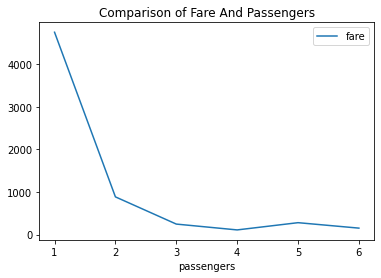

In [7]:
passAndfare=taxi.pivot_table('fare', index='passengers',aggfunc="count").plot().set_title("Comparison of Fare And Passengers")
passAndfare

### Comparing Fare And Passengers (BAR_PLOT)

Text(0.5, 1.0, 'Comparison of Fare And Passengers')

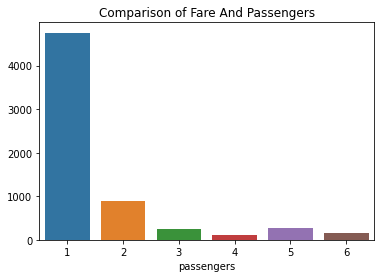

In [8]:
passAndfare=taxi.pivot_table('fare', columns=['passengers'],aggfunc='count')
passAndfare
sns.barplot(data=passAndfare).set_title("Comparison of Fare And Passengers")


### counting total payment wrt passengers

In [9]:
cashORcredit=taxi.pivot_table('payment', columns=['passengers'],aggfunc='count')
cashORcredit

passengers,1,2,3,4,5,6
payment,4753,887,248,111,281,153


### Data wrt Cash And Credit

Text(0.5, 1.0, 'Cash And Credit')

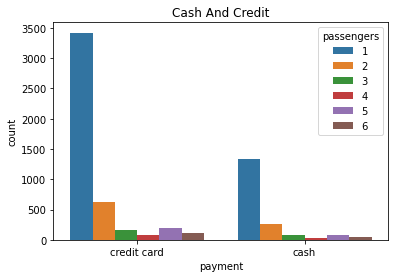

In [10]:
sns.countplot(x=taxi["payment"],hue=taxi["passengers"]).set_title("Cash And Credit")

### total no. of cars wrt color

In [11]:
y_g=taxi['color'].value_counts()
y_g

yellow    5451
green      982
Name: color, dtype: int64

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Total no. of Cars WRT Color')

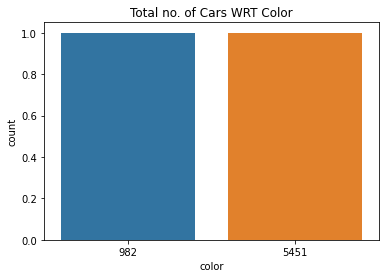

In [12]:
sns.countplot(y_g).set_title("Total no. of Cars WRT Color")

In [13]:
fareAndColor=taxi.groupby("color").count()
fareAndColor["fare"]

color
green      982
yellow    5451
Name: fare, dtype: int64

In [14]:
fareAndColor=taxi.groupby("color").sum()
fareAndColor["fare"]

color
green     13788.15
yellow    70426.72
Name: fare, dtype: float64

Text(0.5, 1.0, 'Average Fare According to Color')

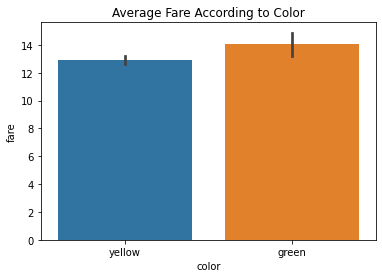

In [15]:
sns.barplot(y=taxi["fare"],x=taxi["color"]).set_title("Average Fare According to Color")

In [16]:
fareAndColor_T=taxi.groupby("color").sum()
fareAndColor_T

,passengers,distance,fare,tip,tolls,total
color,,,,,,
green,1228,3345.95,13788.15,781.14,270.37,16186.91
yellow,8810,16111.41,70426.72,11951.18,1822.11,102938.06


Text(0.5, 1.0, 'Data Comparssion According To Color')

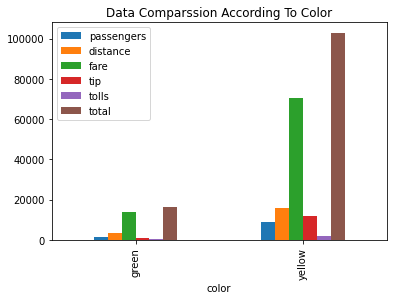

In [17]:
fareAndColor_T.plot(kind="bar").set_title("Data Comparssion According To Color")

In [18]:
pickup_T=taxi.groupby("pickup_borough").sum()
pickup_T

,passengers,distance,fare,tip,tolls,total
pickup_borough,,,,,,
Bronx,119,566.86,2078.91,14.71,77.04,2253.76
Brooklyn,504,1554.47,6332.48,370.11,109.44,7372.48
Manhattan,8392,12399.76,59307.42,10325.37,771.12,88539.11
Queens,1023,4936.27,16496.06,2022.13,1134.88,20959.62


Text(0.5, 1.0, 'Data Comparsion According To Pickup')

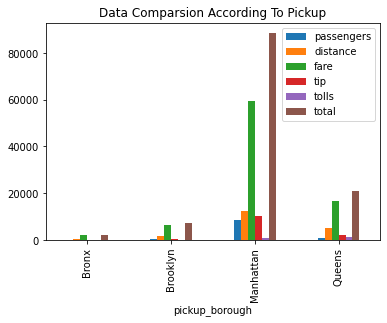

In [19]:
pickup_T.plot(kind="bar").set_title("Data Comparsion According To Pickup")

Text(0.5, 1.0, 'Drop off Comparsion WRT Pickup ')

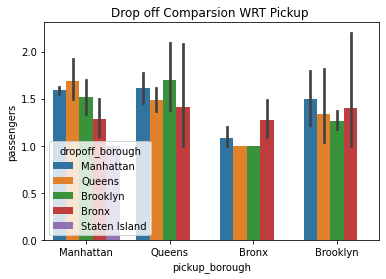

In [20]:
sns.barplot(y=taxi["passengers"],x=taxi["pickup_borough"],hue=taxi["dropoff_borough"]).set_title("Drop off Comparsion WRT Pickup ")
